<h1>Importing Libraries</h1>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
import warnings

In [4]:
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('MY2022 Fuel Consumption Ratings.csv')

In [6]:
df

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


<h1>Data Preprocessing</h1>

In [8]:
df.isnull().sum()

Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

In [9]:
df['Model Year'].value_counts()

Model Year
2022    946
Name: count, dtype: int64

In [10]:
df = df.drop(['Model Year'],axis=1)
df = df.drop(['Model'],axis=1)

In [11]:
ordered_columns = [
    'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type',
    'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
    'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))', 'CO2 Emissions(g/km)'
]

df = df[ordered_columns]

In [12]:
df

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km)
0,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230
...,...,...,...,...,...,...,...,...,...,...
941,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
942,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
943,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
944,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


<h1>Converting Categorical Into Numerical</h1>

In [14]:
le = LabelEncoder()

df['Vehicle Class'] = le.fit_transform(df['Vehicle Class'])
df['Fuel Type'] = le.fit_transform(df['Fuel Type'])

df_without_transmission = [
    
    'Vehicle Class', 'Engine Size(L)', 'Cylinders',  'Fuel Type',
    'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
    'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))', 'CO2 Emissions(g/km)'
]

df_2 = df[df_without_transmission]

In [15]:
df_2

,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km)
0,0,2.4,4,3,9.9,7.0,8.6,33,200
1,7,3.5,6,3,12.6,9.4,11.2,25,263
2,7,2.0,4,3,11.0,8.6,9.9,29,232
3,7,2.0,4,3,11.3,9.1,10.3,27,242
4,0,2.0,4,3,11.2,8.0,9.8,29,230
...,...,...,...,...,...,...,...,...,...
941,7,2.0,4,3,10.7,7.7,9.4,30,219
942,7,2.0,4,3,10.5,8.1,9.4,30,219
943,7,2.0,4,3,11.0,8.7,9.9,29,232
944,8,2.0,4,3,11.5,8.4,10.1,28,236


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Vehicle Class                      946 non-null    int32  
 1   Engine Size(L)                     946 non-null    float64
 2   Cylinders                          946 non-null    int64  
 3   Transmission                       946 non-null    object 
 4   Fuel Type                          946 non-null    int32  
 5   Fuel Consumption (City (L/100 km)  946 non-null    float64
 6   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 7   Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 8   Fuel Consumption(Comb (mpg))       946 non-null    int64  
 9   CO2 Emissions(g/km)                946 non-null    int64  
dtypes: float64(4), int32(2), int64(3), object(1)
memory usage: 66.6+ KB


In [17]:
df.describe()

,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km)
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,6.104651,3.198732,5.668076,2.410148,12.506448,9.363319,11.092072,27.247357,259.172304
std,3.748247,1.374814,1.932670,0.670515,3.452043,2.285125,2.876276,7.685217,64.443149
min,0.000000,1.200000,3.000000,0.000000,4.000000,3.900000,4.000000,11.000000,94.000000
25%,2.000000,2.000000,4.000000,2.000000,10.200000,7.700000,9.100000,22.000000,213.250000
50%,7.000000,3.000000,6.000000,2.000000,12.200000,9.200000,10.800000,26.000000,257.000000
75%,8.000000,3.800000,6.000000,3.000000,14.700000,10.700000,12.900000,31.000000,300.750000
max,13.000000,8.000000,16.000000,3.000000,30.300000,20.900000,26.100000,71.000000,608.000000


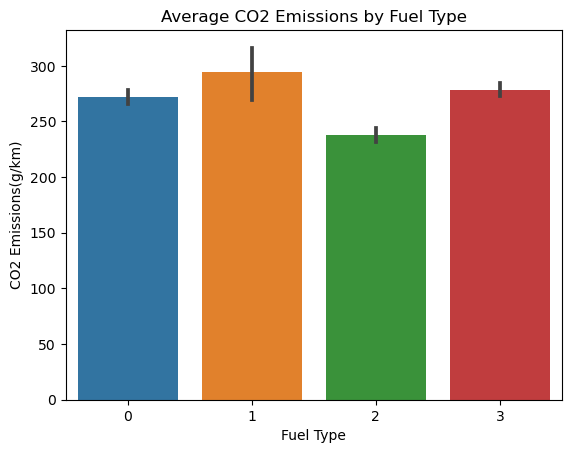

In [106]:
sns.barplot(x="Fuel Type", y="CO2 Emissions(g/km)", data=df)
plt.title("Average CO2 Emissions by Fuel Type")
plt.show()

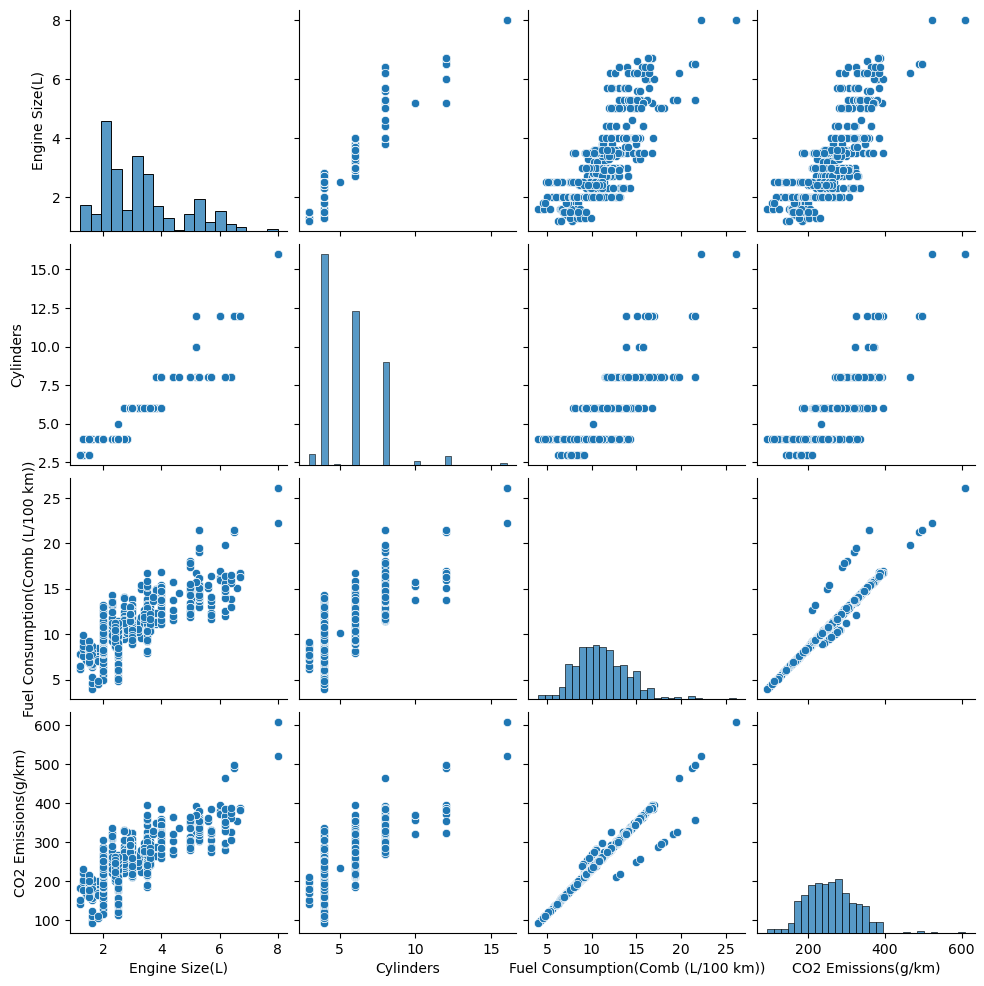

In [19]:
sns.pairplot(df[["Engine Size(L)", "Cylinders", "Fuel Consumption(Comb (L/100 km))", "CO2 Emissions(g/km)"]])
plt.show()

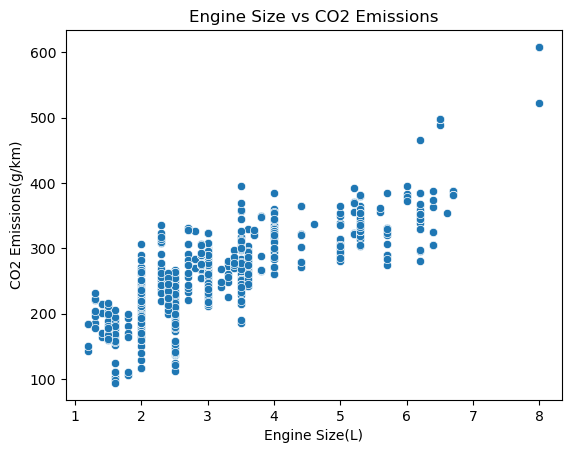

In [20]:
sns.scatterplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df)
plt.title("Engine Size vs CO2 Emissions")
plt.show()

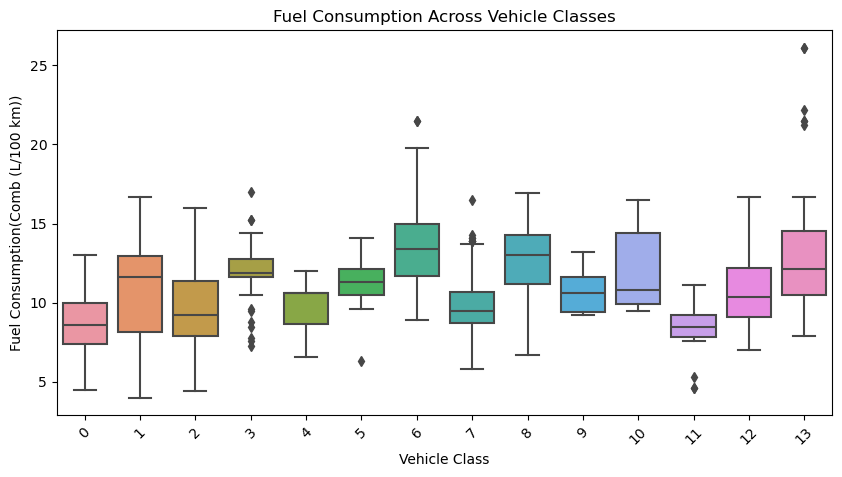

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Vehicle Class", y="Fuel Consumption(Comb (L/100 km))", data=df)
plt.xticks(rotation=45)
plt.title("Fuel Consumption Across Vehicle Classes")
plt.show()

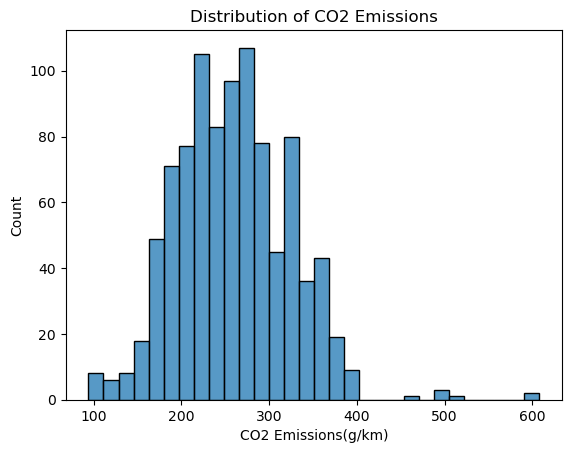

In [108]:
sns.histplot(df["CO2 Emissions(g/km)"], bins=30)
plt.title("Distribution of CO2 Emissions")
plt.show()

<Axes: >

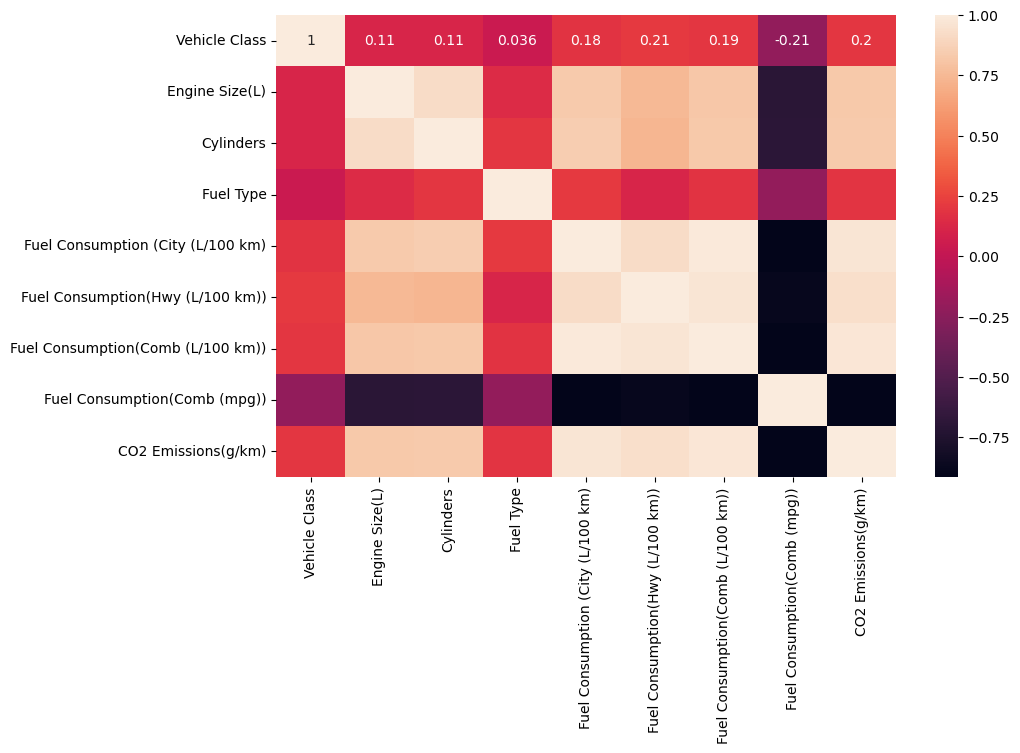

In [23]:
corre = df_2.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corre,annot=True)

<h1>Making Linear Regression From Scratch</h1>

In [25]:
class MyLR:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)  
        
        # Calculate the coefficients using the Normal Equation
        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self, X_test):
        X_test = np.insert(X_test, 0, 1, axis=1)  
        y_pred = np.dot(X_test, np.concatenate(([self.intercept_], self.coef_)))  
        return y_pred

    def get_params(self, deep=True):
        """Return the parameters for this estimator."""
        return {}

    def set_params(self, **params):
        """Set the parameters for this estimator."""
        return self


In [26]:
dr = DecisionTreeRegressor(max_depth=3)

<h1>Splitting Data Into Test and Train</h1>

In [28]:
X = df_2.iloc[:,0:7]
y = df_2.iloc[:,-1]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, random_state = 101)

In [30]:
sc = StandardScaler()

X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [31]:
lr = MyLR()

In [32]:
lr.fit(X_train_s, y_train)
dr.fit(X_train_s, y_train)

DecisionTreeRegressor(max_depth=3)

In [33]:
y_pred_scratch_lr = lr.predict(X_test_s)
y_pred_dr = dr.predict(X_test_s)

In [34]:
mse_lr = mean_squared_error(y_test, y_pred_scratch_lr)
mse_dr = mean_squared_error(y_test, y_pred_dr)

In [35]:
r2_lr = r2_score(y_test, y_pred_scratch_lr)
r2_dr = r2_score(y_test,y_pred_dr)

In [36]:
mse_lr

313.91129085174623

In [37]:
mse_dr

356.2123424115327

In [38]:
r2_lr

0.9218378811636948

In [39]:
r2_dr

0.9113051608848368

<h1>Hyper-parameter Optimization with Cross-Validation</h1>

In [41]:
param_grid_dr = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}

grid_search_dr = GridSearchCV(DecisionTreeRegressor(), param_grid_dr, cv=5)
grid_search_dr.fit(X_train_s, y_train)

grid_search_dr.best_params_

{'max_depth': 7, 'min_samples_split': 10}

In [42]:
param_grid_lr = {
    'fit_intercept': [True, False],
    'normalize': [True, False]  
}

grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='r2')
grid_search_lr.fit(X_train_s, y_train)

grid_search_lr.best_params_


{'fit_intercept': True, 'normalize': True}

<h1>Feature Selection</h1>

In [44]:
rfe = RFE(estimator=lr, n_features_to_select=6)
X_train_selected = rfe.fit_transform(X_train_s, y_train)
X_test_selected = rfe.transform(X_test_s)

# Get selected feature names
selected_features = X.columns[rfe.support_]
print("Selected Features for Linear Regression:", selected_features)

Selected Features for Linear Regression: Index(['Engine Size(L)', 'Cylinders', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))'],
      dtype='object')


In [45]:
# DecisionTreeRegressor doesn't require Feature Selection as it does it while training the data

In [46]:
selected_features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption (City (L/100 km)',
                     'Fuel Consumption(Hwy (L/100 km))', 'Fuel Consumption(Comb (L/100 km))']


df_3 = df_2[selected_features]

In [47]:
df_3

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km))
0,2.4,4,9.9,7.0,8.6
1,3.5,6,12.6,9.4,11.2
2,2.0,4,11.0,8.6,9.9
3,2.0,4,11.3,9.1,10.3
4,2.0,4,11.2,8.0,9.8
...,...,...,...,...,...
941,2.0,4,10.7,7.7,9.4
942,2.0,4,10.5,8.1,9.4
943,2.0,4,11.0,8.7,9.9
944,2.0,4,11.5,8.4,10.1


<h1>Final Model</h1>

In [49]:
class MyLR_2:
    def __init__(self, fit_intercept=True, normalize=False):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.coef_ = None
        self.intercept_ = None
        self.mean_ = None
        self.std_ = None

    def fit(self, X_train, y_train):
        if self.normalize:
            self.mean_ = np.mean(X_train, axis=0)
            self.std_ = np.std(X_train, axis=0)
            X_train = (X_train - self.mean_) / self.std_

        if self.fit_intercept:
            X_train = np.insert(X_train, 0, 1, axis=1)  

        # Normal Equation
        betas = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

        if self.fit_intercept:
            self.intercept_ = betas[0]
            self.coef_ = betas[1:]
        else:
            self.intercept_ = 0
            self.coef_ = betas

    def predict(self, X_test):
        if self.normalize:
            X_test = (X_test - self.mean_) / self.std_

        if self.fit_intercept:
            X_test = np.insert(X_test, 0, 1, axis=1)  

        return X_test @ np.concatenate(([self.intercept_], self.coef_))

    def get_params(self, deep=True):
        """Return model parameters."""
        return {"fit_intercept": self.fit_intercept, "normalize": self.normalize}

    def set_params(self, **params):
        """Set model parameters."""
        for key, value in params.items():
            setattr(self, key, value)
        return self


In [50]:
lr_2 = MyLR_2(fit_intercept=True, normalize=True)

In [51]:
X_new = df_3.iloc[:,0:5]
y_new = df_3.iloc[:,-1]

In [52]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=101)

In [53]:
sc_2 = StandardScaler()

X_train_new_s = sc_2.fit_transform(X_train_new)
X_test_new_s = sc_2.transform(X_test_new)

In [54]:
lr_2.fit(X_train_new_s,y_train_new)

In [55]:
y_pred_lr_2 = lr_2.predict(X_test_new_s)

In [56]:
mean_squared_error(y_test_new, y_pred_lr_2)

1.6528956715388338e-24

In [57]:
r2_score(y_test_new, y_pred_lr_2)

1.0